<a href="https://colab.research.google.com/github/KacperWalczak/image_processing_lab6/blob/main/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zadanie 1.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

main_directory = '/content/drive/MyDrive/lab6'
tf.keras.utils.image_dataset_from_directory(
    main_directory,
    labels='inferred'
    )


Found 704 files belonging to 2 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [4]:
batch_size = 30
img_height = 128
img_width = 128

train_ds = tf.keras.utils.image_dataset_from_directory(
  main_directory,
  validation_split=0.2,
  subset="training",
  labels='inferred',
  label_mode='categorical',
  seed = 123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  main_directory,
  validation_split=0.2,
  subset="validation",
  labels='inferred',
  label_mode='categorical',
  seed = 123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1002 files belonging to 2 classes.
Using 802 files for training.
Found 1002 files belonging to 2 classes.
Using 200 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['Animals-10', 'Animals-10_2']


In [6]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [7]:
#Stworzenie modelu
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)])

#Skompilowanie modelu
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1

In [8]:
#Trenowanie
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
27/27 [==============================] - 238s 2s/step - loss: 0.0994 - accuracy: 0.9751 - val_loss: 0.0631 - val_accuracy: 0.9900
Epoch 2/10
27/27 [==============================] - 17s 633ms/step - loss: 0.0551 - accuracy: 0.9925 - val_loss: 0.0583 - val_accuracy: 0.9900
Epoch 3/10
27/27 [==============================] - 18s 648ms/step - loss: 0.0538 - accuracy: 0.9925 - val_loss: 0.0577 - val_accuracy: 0.9900
Epoch 4/10
27/27 [==============================] - 17s 632ms/step - loss: 0.0453 - accuracy: 0.9925 - val_loss: 0.0536 - val_accuracy: 0.9900
Epoch 5/10
27/27 [==============================] - 17s 627ms/step - loss: 0.0469 - accuracy: 0.9925 - val_loss: 0.0576 - val_accuracy: 0.9900
Epoch 6/10
27/27 [==============================] - 17s 616ms/step - loss: 0.0374 - accuracy: 0.9925 - val_loss: 0.0601 - val_accuracy: 0.9900
Epoch 7/10
27/27 [==============================] - 19s 679ms/step - loss: 0.0344 - accuracy: 0.9925 - val_loss: 0.0479 - val_accuracy: 0.9900
E

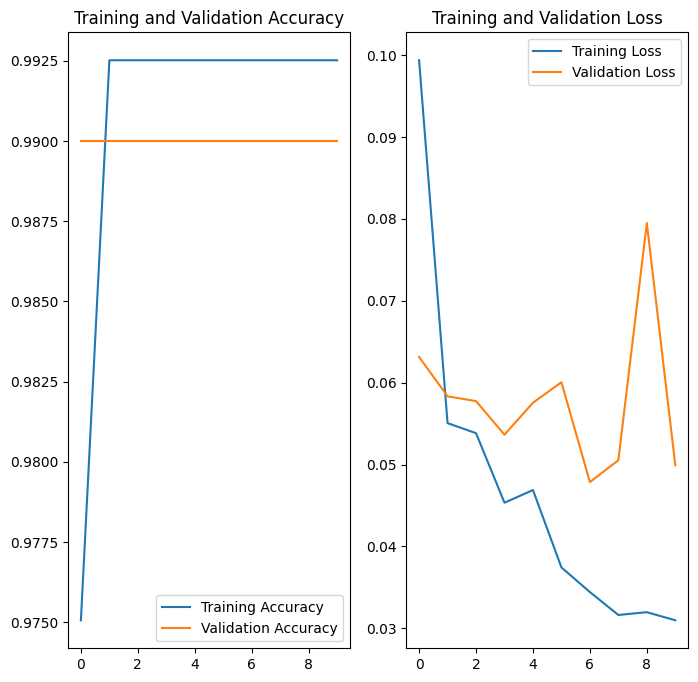

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

- overfitting - wzrost dokładności uczenia w sposób liniowy, natomiast dokładność walidacji zatrzymuje się -> oznaka nadmiernego dopasowania


Zadanie 2.

In [10]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
  ]
)

In [11]:
#Stworzenie modelu
num_classes = len(class_names)

model2 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(4, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(num_classes)])

#Skompilowanie modelu
model2.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 4)       112       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 4)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 8)         296       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 8)        0         
 2D)                                                  

In [12]:
#Trenowanie
epochs=10
history2 = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
27/27 [==============================] - 13s 388ms/step - loss: 0.1102 - accuracy: 0.9825 - val_loss: 0.0683 - val_accuracy: 0.9900
Epoch 2/10
27/27 [==============================] - 12s 433ms/step - loss: 0.0730 - accuracy: 0.9925 - val_loss: 0.0533 - val_accuracy: 0.9900
Epoch 3/10
27/27 [==============================] - 12s 466ms/step - loss: 0.0717 - accuracy: 0.9925 - val_loss: 0.0614 - val_accuracy: 0.9900
Epoch 4/10
27/27 [==============================] - 12s 436ms/step - loss: 0.0472 - accuracy: 0.9925 - val_loss: 0.0552 - val_accuracy: 0.9900
Epoch 5/10
27/27 [==============================] - 12s 422ms/step - loss: 0.0530 - accuracy: 0.9925 - val_loss: 0.0515 - val_accuracy: 0.9900
Epoch 6/10
27/27 [==============================] - 12s 443ms/step - loss: 0.0487 - accuracy: 0.9925 - val_loss: 0.0513 - val_accuracy: 0.9900
Epoch 7/10
27/27 [==============================] - 12s 459ms/step - loss: 0.0589 - accuracy: 0.9925 - val_loss: 0.0604 - val_accuracy: 0.9900

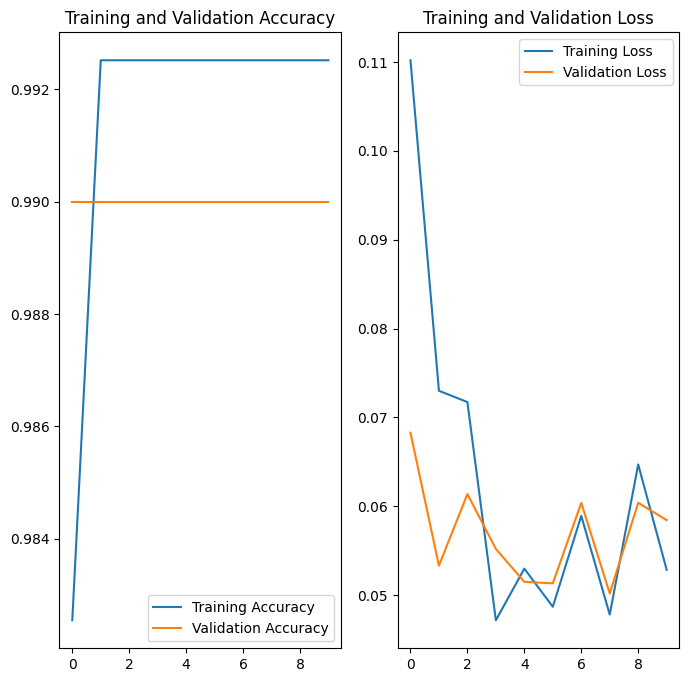

In [13]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Zadanie 2.2

In [14]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
  ]
)

In [16]:
#Stworzenie modelu
num_classes = len(class_names)

model22 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(4, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(num_classes)])

#Skompilowanie modelu
model22.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model22.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 4)       112       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 64, 64, 4)        0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 8)         296       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 32, 32, 8)        0         
 g2D)                                                 

In [ ]:
#Trenowanie
epochs=20
history22 = model22.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
120/120 [==============================] - 39s 318ms/step - loss: 1.0720 - accuracy: 0.4077 - val_loss: 1.0251 - val_accuracy: 0.4533
Epoch 2/20
120/120 [==============================] - 39s 324ms/step - loss: 0.9838 - accuracy: 0.4968 - val_loss: 0.9675 - val_accuracy: 0.4933
Epoch 3/20
120/120 [==============================] - 38s 316ms/step - loss: 0.9161 - accuracy: 0.5546 - val_loss: 0.9461 - val_accuracy: 0.5456
Epoch 4/20
120/120 [==============================] - 38s 317ms/step - loss: 0.8921 - accuracy: 0.5817 - val_loss: 0.9816 - val_accuracy: 0.5200
Epoch 5/20
120/120 [==============================] - 38s 318ms/step - loss: 0.8607 - accuracy: 0.5882 - val_loss: 0.9027 - val_accuracy: 0.5867
Epoch 6/20
120/120 [==============================] - 38s 318ms/step - loss: 0.8426 - accuracy: 0.6094 - val_loss: 0.9228 - val_accuracy: 0.5711
Epoch 7/20
120/120 [==============================] - 38s 319ms/step - loss: 0.8267 - accuracy: 0.6178 - val_loss: 0.8258 - val_ac

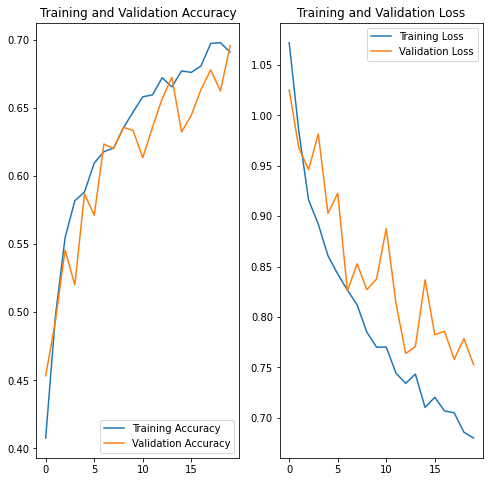

In [ ]:
acc = history22.history['accuracy']
val_acc = history22.history['val_accuracy']

loss = history22.history['loss']
val_loss = history22.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()